In [5]:
import pandas as pd
import spacy, re
import numpy as np
from collections import Counter, defaultdict
#from unidecode import unidecode
import seaborn as sns

# Exemple de lemmatisation

In [2]:
inputText =\
"""
Bonjour bonjour

Lors de notre point mensuel sur la CSS je m’aperçois que sur le mois de mars nous avons énormément de tardifs qui ont été réglés sur mars en comparaison au mois de février. Je ne m’explique pas ce phénomène surtout que de ce que j’avais compris les non règlements du fait du pb avec OXANTIS ne concernaient que 5M€ au total et pour des soins 2019 et que cela devait finalement être récupéré sur le mois d’avril. De mon côté je ne pense pas avoir vu d’alerte sur des factures datant de 2015 et après qui n’auraient pas été réglées. D’où « sortent » ces règlements ?

Je n’ai surement pas tout suivi dans le détail mais je trouve que les tardifs sont très élevés et il me sera demandé une explication par le Fonds CSS. Il est nécessaire je pense d’approfondir ce sujet car cela pourrait avoir des répercussions importantes sur notre définitif au niveau de la mutuelle si ce phénomène est généralisé

   merci côté stats de me donner des précisions sur ce constat pour la CSS et si ceci est également constaté sur l’ensemble du portefeuille HM.
	Et en // merci à Nadège de regarder si tout est OK coté intégration dans DECIBEL

D’avance je vous remercie pour toutes les précisions que vous pourrez m’apporter et je vous souhaite une bonne journée

"""

In [3]:
#fr_dep_news_trf, fr_core_news_md
lemmatizer = spacy.load("fr_core_news_md", disable = ['parser', 'attribute_ruler', 'ner'])
print("Pipeline:", lemmatizer.pipe_names)

Pipeline: ['tok2vec', 'morphologizer', 'lemmatizer']


In [4]:
doc = lemmatizer(inputText)  # Create a Doc from raw text
words_lemmas_list = [unidecode(token.lemma_.lower()) for token in doc if not token.is_stop and re.match('^\w+$', token.lemma_.lower()) is not None]
print(words_lemmas_list)

['bonjour', 'bonjour', 'point', 'mensuel', 'css', 'apercevoir', 'mois', 'mars', 'enormement', 'tardif', 'etre', 'regler', 'mars', 'comparaison', 'mois', 'fevrier', 'explique', 'phenomene', 'non', 'reglement', 'probleme', 'oxantis', 'concerner', 'total', 'soin', '2019', 'devoir', 'finalement', 'recuperer', 'mois', 'avril', 'cote', 'alerte', 'facture', 'dater', '2015', 'etre', 'regler', 'sortir', 'reglement', 'surement', 'suivre', 'detail', 'trouve', 'tardif', 'eleve', 'demander', 'explication', 'fonds', 'css', 'necessaire', 'approfondir', 'sujet', 'repercussion', 'important', 'definitif', 'niveau', 'mutuel', 'phenomene', 'generaliser', 'cote', 'stat', 'donner', 'precision', 'constat', 'css', 'constater', 'ensemble', 'portefeuille', 'hm', 'nadege', 'regarder', 'ok', 'cote', 'integration', 'decibel', 'avance', 'remercier', 'precision', 'pouvoir', 'apporter', 'souhaite', 'bon', 'journee']


# Application au dataset

In [5]:
with open('firstdataset.csv','r', encoding='utf-16') as csvfile:
    data = csvfile.read()
with open('firstdataset2.csv','w', encoding='utf-16') as csvfile:
    csvfile.write(data.replace('\x00',''))

In [5]:
dataset1 = pd.read_csv('firstdataset2.csv',index_col = 0,sep='¤',quotechar='§',encoding='UTF-16', engine='python',header=0, skipinitialspace=True, skip_blank_lines = True)
print(dataset1.shape)
dataset1.head()

(3296, 3)


,demande_de_support,sender,text
0,0,plonquet nadège,1ère relecture gt conso yohan quand tu as le t...
1,0,plonquet nadège,accepter pour accepter la demande cliquez simp...
2,1,guillaume veronique,acces decibel bonjour pouvez-vous donner les a...
3,1,gueniot bernard,accès rec4 decibel sdw-rec4 hm dm ad restituti...
4,1,levisse xavier,actes indemnités hospitalières tu sais ce que ...


In [6]:
from preprocessing import WriteFinalDataset
WriteFinalDataset(inputFile='firstdataset2.csv',outputFile='finaldataset.csv')

Lecture de firstdataset2.csv ...
Traitement des données ...
[############################################################] 3296/3296


Ecriture de finaldataset.csv ...


In [6]:
data = pd.read_csv('finaldataset.csv', index_col = 0, header=0, encoding='utf-16', dtype=int)
data

,1ere,relecture,gt,consommation,yohan,temps,dire,clair,mettre,decibel,...,rcsup,noyer,redetailler,brosset,faculte,lavoisier,lepaumier,3xx5521b,minuscule,demande_de_support
0,1,1,1,1,1,1,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3291,0,0,0,0,0,0,0,0,2,0,...,1,0,0,0,0,0,0,0,0,0
3292,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
3293,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3294,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,0,0,0


In [8]:
Counter(data['demande_de_support'])

Counter({0: 2673, 1: 454, 2: 169})

In [9]:
data.var().sort_values(ascending = False)

dtm          65.975719
cr           46.003782
tr           37.586343
support      35.467086
mutuel       26.953281
               ...    
assigner      0.000303
lafabriqu     0.000303
hautier       0.000303
25am          0.000303
octroi        0.000303
Length: 10360, dtype: float64

C:\Users\le_paumier-m\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='support', ylabel='mutuel'>

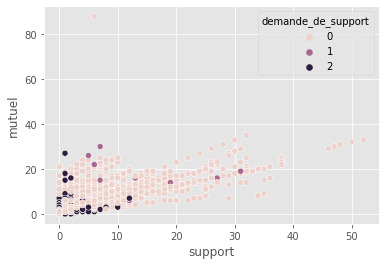

In [15]:
sns.scatterplot(data.support, data.mutuel, hue = data.demande_de_support)

## KMeans et apprentissage semi-supervisé

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import pickle
plt.style.use('ggplot')

In [18]:
X_unlabeled = data.loc[data["demande_de_support"] == 2].drop(columns=['demande_de_support'])
X = data.loc[data["demande_de_support"] != 2].drop(columns=['demande_de_support'])
y = pd.Series(data.loc[data["demande_de_support"] != 2]['demande_de_support'], dtype=int)

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
kmeans1 = KMeans(n_clusters=2)
kmeans1.fit(X_train, y_train)

y_pred = kmeans1.predict(X_test)
accuracy_score(y_test,y_pred)

0.7806176783812566

In [20]:
new_labels = kmeans1.predict(X_unlabeled)
newX = np.vstack((X, X_unlabeled))
newY = np.hstack((y, new_labels))

print(newX.shape, newY.shape)

(3296, 10359) (3296,)


# Construction d'un prédicteur

## SVC

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(newX, newY, test_size=0.2, random_state=90210)

In [48]:
gridCV = GridSearchCV(SVC(),
    n_jobs=-1,
    param_grid = {
        'C' : [0.1325],
        'kernel' : ['linear'],
        #'degree' : [1, 2, 3, 4],
        #'gamma' : ['scale', 'auto'] + list(np.linspace(0,2,3)),
        #'coef0' : np.linspace(-2,2,5),
        'class_weight' : ['balanced', None],
        #'decision_function_shape' : ['ovo', 'ovr']
    }
)

gridCV.fit(X_train, y_train)
print(gridCV.best_params_)
print(gridCV.best_score_)
#{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

{'C': 0.1325, 'class_weight': None, 'kernel': 'linear'}
0.9192010235179116


In [14]:
model_svc = SVC(C=0.1325, kernel = 'linear')
model_svc.fit(X_train, y_train)
y_pred = model_svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.9151515151515152

On peut aussi accèder au score de chaque classe

In [ ]:
model_svc.predict_proba(X_train)

In [ ]:
filename = 'svc_c01325_lin.sav'
with open(filename, 'wb') as file:
    pickle.dump(model_svc, file)

## Regression logistique

In [21]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(newX, newY, test_size=0.2, random_state=90210)

In [31]:
LR = LogisticRegression(C=1, solver = 'newton-cg')
LR.fit(X_train, y_train)

LogisticRegression(C=1, solver='newton-cg')

In [32]:
y_pred = LR.predict(X_test)
accuracy_score(y_test, y_pred)

0.9181818181818182

In [36]:
np.round(LR.predict_proba(X_train),2)

array([[1.  , 0.  ],
       [0.95, 0.05],
       [0.04, 0.96],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [42]:
filename = 'lr_c1_newtoncg.sav'
with open(filename, 'wb') as file:
    pickle.dump(LR, file)

## Exemple de pipeline

In [15]:
from lemmatization import lemmatizeText, initSpacy
lemmatizer = initSpacy('fr_core_news_md')

In [33]:
input_mail = """
    DRS - 
    Bonjour
    j'ai un souci avec le décisionnel DECIBEL, il y a un problème de référenciel.

    Cordialement,
    Martin
    """

In [29]:
def pipeline(mail, model_file, schema, lemmatizer):
    features = defaultdict(int)
    features.update(lemmatizeText(mail, lemmatizer))
    X = np.array([features[key] for key in schema]).reshape(1, -1)    
    with open(model_file, 'rb') as file:
        model = pickle.load(file)

    try:
        probas = model.predict_proba(X)[0]
    except AttributeError:
        probas = [None, None]
    
    y = model.predict(X)[0]
    return {'predicted_class' : y, 'confidence' : probas[y], 'model' : model_file}

In [34]:
model_file = 'lr_c1_newtoncg.sav'
schema = X.columns.to_list()
predicted_class = pipeline(input_mail, model_file, schema, lemmatizer)
predicted_class

array([1])

to-do :

* vote majoritaire entre plusieurs modèles
* refit les modèles en infériorité numérique / refit périodiquement les moins bons modèles (p.r à un score de prédiction calculé sur la période)
* gerer les cas douteux grace à la proba